# Portfolio Part 4 - Analysis and Prediction of Housing Price

#  First we import Libraries,explore the data and clean the data 

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
%matplotlib inline

In [9]:
df_uncleaned = pd.read_csv('files/housing.csv', index_col=1)

## Explore the Dataset

After Importing the necessary library we can explore the data sets by looking into various parameters such as heading , description to have a general understanding of what the data looks like.

In [10]:
df_uncleaned.head()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
latitude,,,,,,,,,
37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df_uncleaned.describe()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 37.88 to 39.37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   housing_median_age  20640 non-null  float64
 2   total_rooms         20640 non-null  float64
 3   total_bedrooms      20433 non-null  float64
 4   population          20640 non-null  float64
 5   households          20640 non-null  float64
 6   median_income       20640 non-null  float64
 7   median_house_value  20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.6+ MB


In [13]:
df_uncleaned.shape

(20640, 9)

In [14]:
df_uncleaned.index

Index([37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84,
       ...
       39.29, 39.33, 39.26, 39.19, 39.27, 39.48, 39.49, 39.43, 39.43, 39.37],
      dtype='float64', name='latitude', length=20640)

In [15]:
df_uncleaned['total_bedrooms'].isnull().sum()

207

In [16]:
df_uncleaned.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [17]:
# Drop the 'ocean_proximity' categorical column

df = df_uncleaned.drop('ocean_proximity', axis=1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>],
       [<Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >]],
      dtype=object)

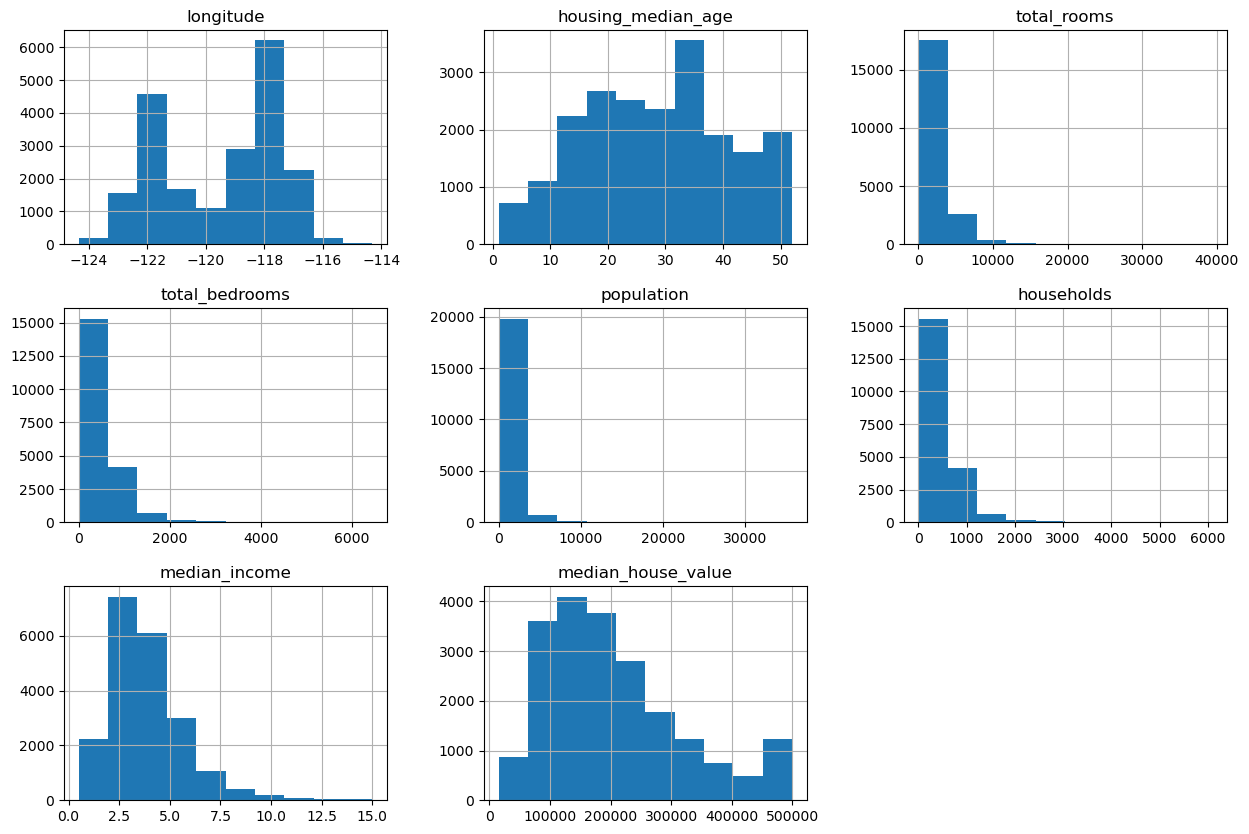

In [18]:
# Create a histogram for each column using a larger figure size

df.hist(figsize = (15,10))

From the above the data we can see that ocean proximity is not numeric data and we have dropped the column ocean proximity to find the correlation with numeric data and find out the variables which are most correlated and least correlated with the median house prices. 

From the above historgram and analysis we can see skeweness of the data .

#  Correlation Matrix

Next we find the correlation between the data and using visualization heat map to see the variables which are most correlated with our target variable median house value.

In [19]:
df.corr()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
housing_median_age,-0.108197,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

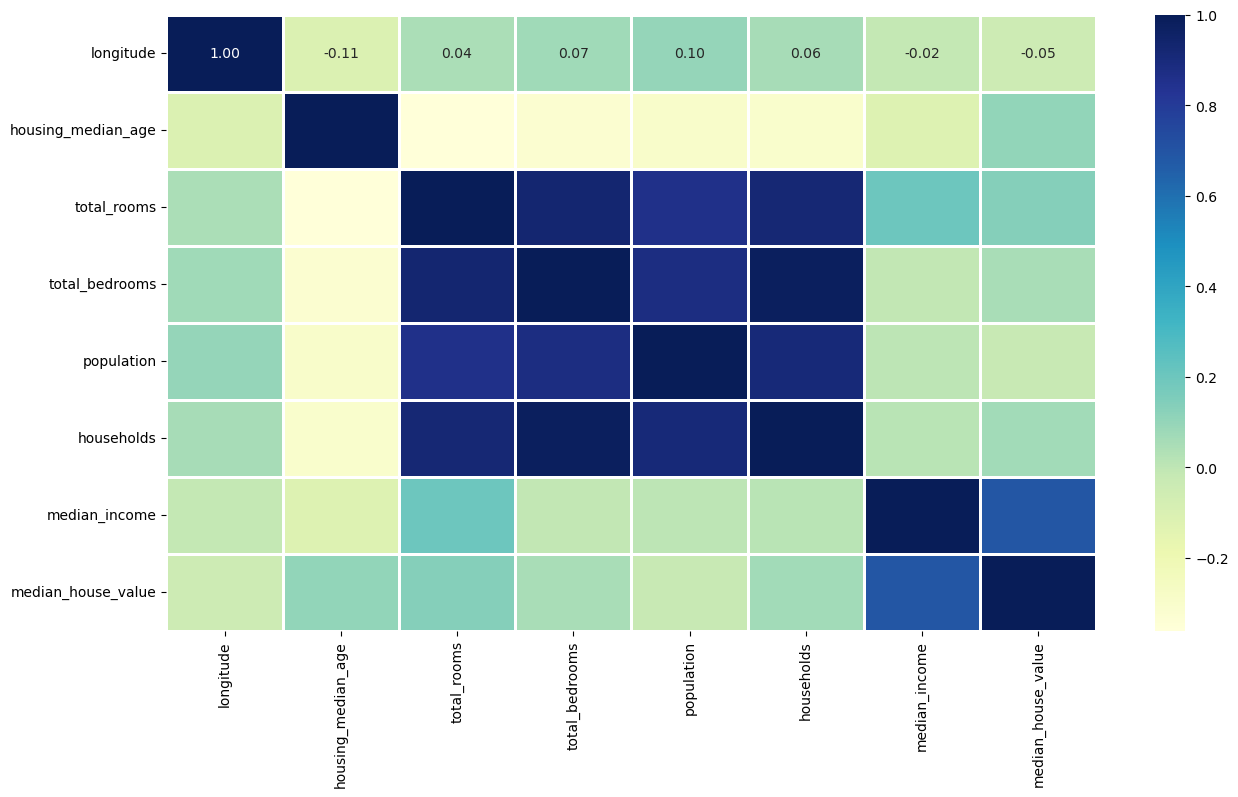

In [20]:
plt.figure(figsize= (15,8))
sns.heatmap(df.corr() , annot = True , linewidths= .9 , fmt = '.2f' , cmap = 'YlGnBu' )

<Axes: xlabel='latitude', ylabel='longitude'>

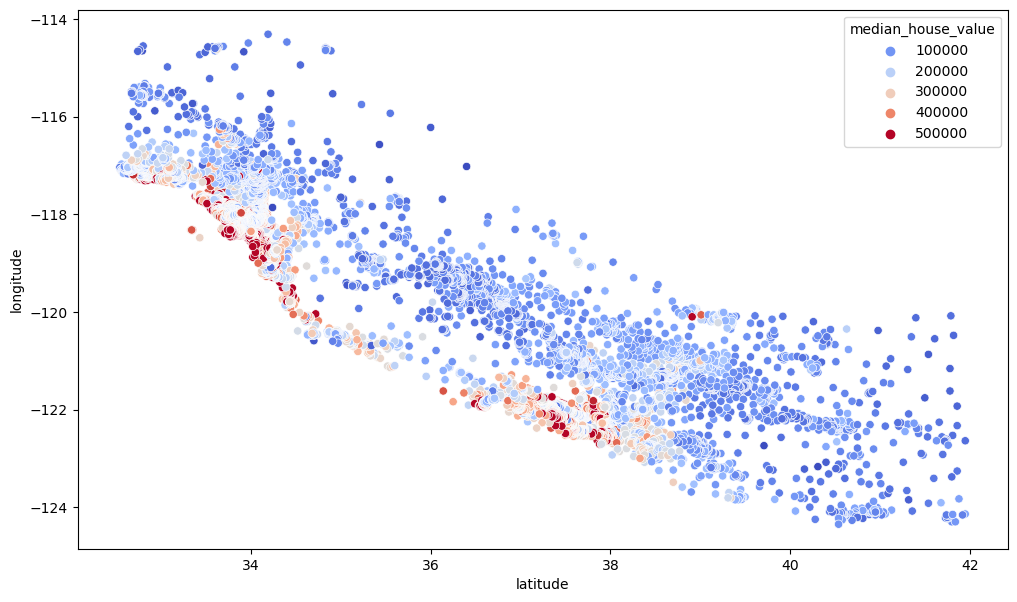

In [21]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'latitude' , y = 'longitude' , data = df , hue = 'median_house_value' , palette = 'coolwarm')

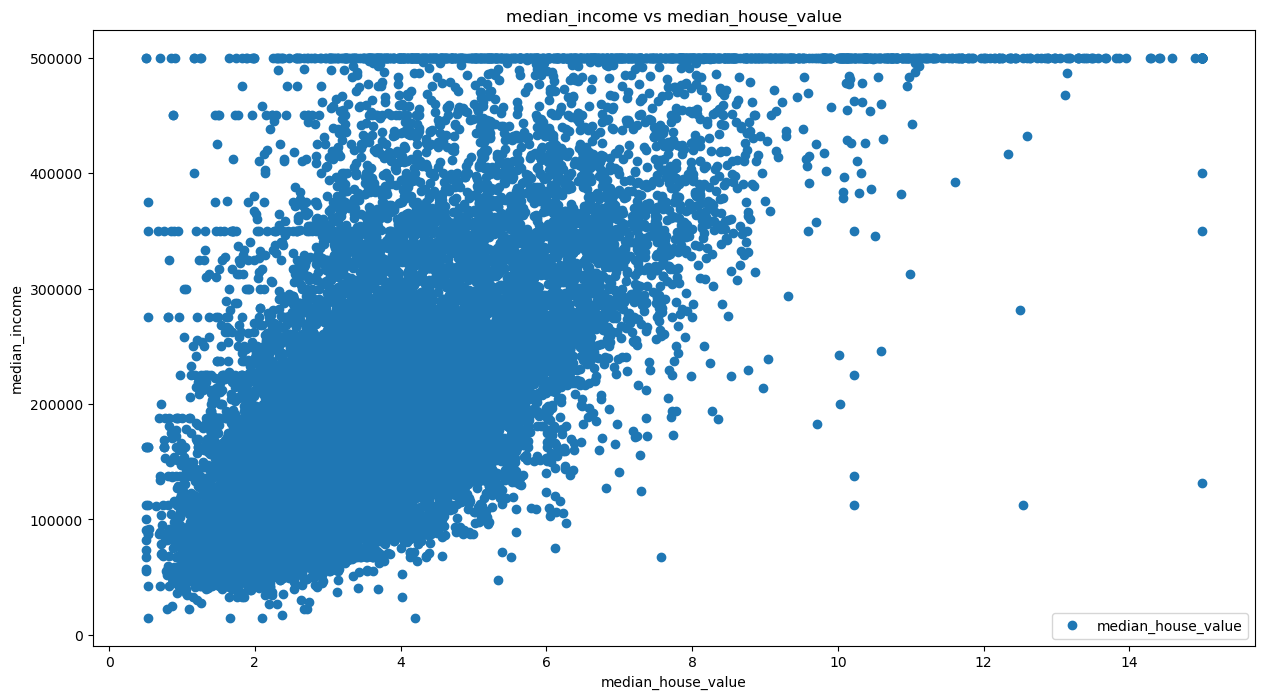

In [22]:
df.plot(x  =  'median_income'  , y = 'median_house_value' , style = 'o' ,figsize = (15,8))
plt.title('median_income vs median_house_value')
plt.xlabel('median_house_value')
plt.ylabel('median_income')
plt.show()


Here from the above correlation diagram we can see that total rooms and medain income are two most correlated variables with our target variable median house price . Further when we plot longitude and latitude in the diagram when see the median house value.



# Splitting the data and training The Algorithm


Here we first split the data into training and test data and apply linear regression and random forest model for predicting the median house values. After testing and splitting we compare their performance .Then, we use bar chart visualization to visualize the difference between the actual and predicted value.

In [25]:
# Separate features (X) and target variable (y)

x = df.drop(['median_house_value'] , axis = 1)   
y = df['median_house_value']                   

In [26]:
# Splitting data Model for training and testing

x_train , x_test , y_train , y_test = train_test_split(x ,y,test_size = .2 , random_state = 42)

In [27]:
def model_eval(model):
    # Print model information
    print("Evaluating Model:", model)

    # Train the model on the training data
    model.fit(x_train, y_train)

    # Make predictions on the testing data
    prediction = model.predict(x_test)

    if type(prediction) == np.float64:
      prediction = prediction.astype(int)

    pred_accuracy = pd.DataFrame({'Actual' : y_test , 'predicted' : prediction})
    print(pred_accuracy)

    pred_accuracy = pred_accuracy.sample(30, replace = True)
    pred_accuracy.plot(kind = 'bar' , figsize = (15,8))
    plt.show()


    # Evaluate model performance using various metrics
    score = model.score(x_test , y_test)
    print(f'{model} score is : {score}')

In [28]:
regressor = LinearRegression()
rd_forest = RandomForestRegressor(n_estimators=900 , max_depth = 350)

Evaluating Model: LinearRegression()
            Actual      predicted
latitude                         
36.06      47700.0   90299.397838
35.14      45800.0  133855.558267
37.80     500001.0  261041.087818
34.28     218600.0  244507.653312
36.62     278000.0  210032.700523
...            ...            ...
33.36     263300.0  197226.276924
35.36     266800.0  171167.680391
37.31     500001.0  431523.006672
36.77      72300.0  167674.968884
34.22     151500.0  163152.375387

[4128 rows x 2 columns]


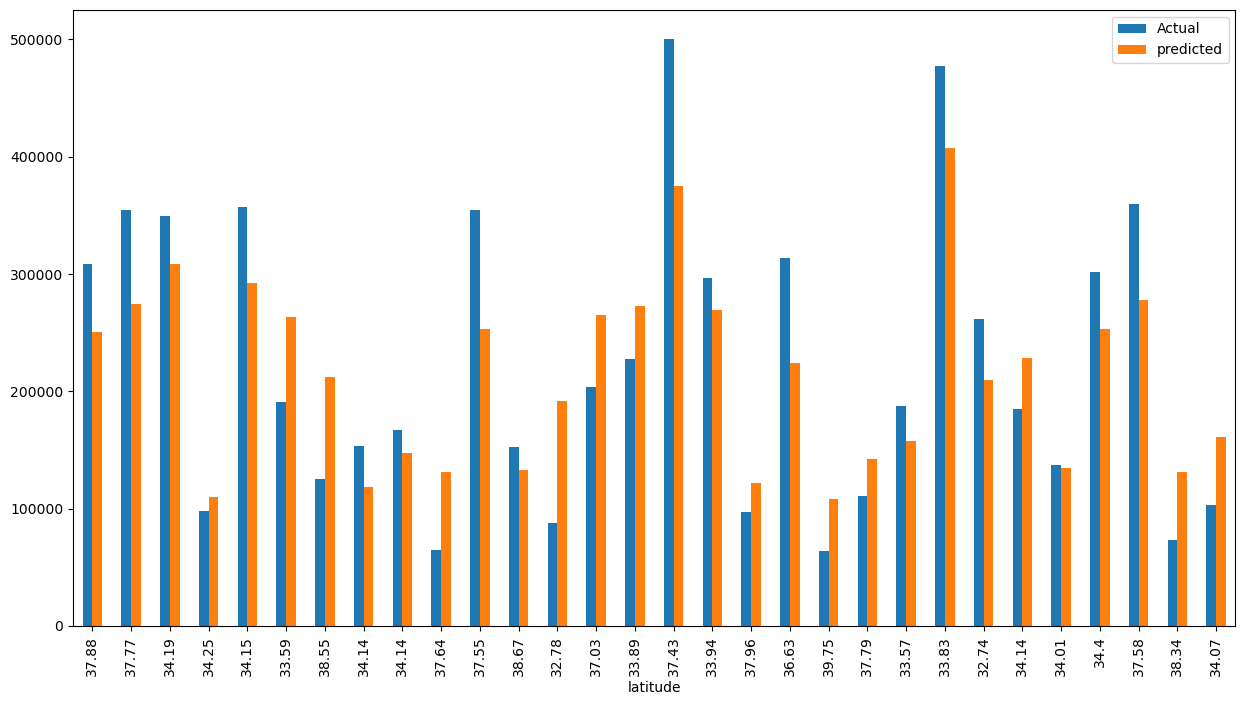

LinearRegression() score is : 0.5444116562428509


In [29]:
model_eval(regressor)

Evaluating Model: RandomForestRegressor(max_depth=350, n_estimators=900)
            Actual      predicted
latitude                         
36.06      47700.0   51271.666667
35.14      45800.0   94416.000000
37.80     500001.0  397825.615556
34.28     218600.0  252483.225556
36.62     278000.0  244960.111111
...            ...            ...
33.36     263300.0  185819.666667
35.36     266800.0  170413.444444
37.31     500001.0  497955.972222
36.77      72300.0   83066.222222
34.22     151500.0  184741.891111

[4128 rows x 2 columns]


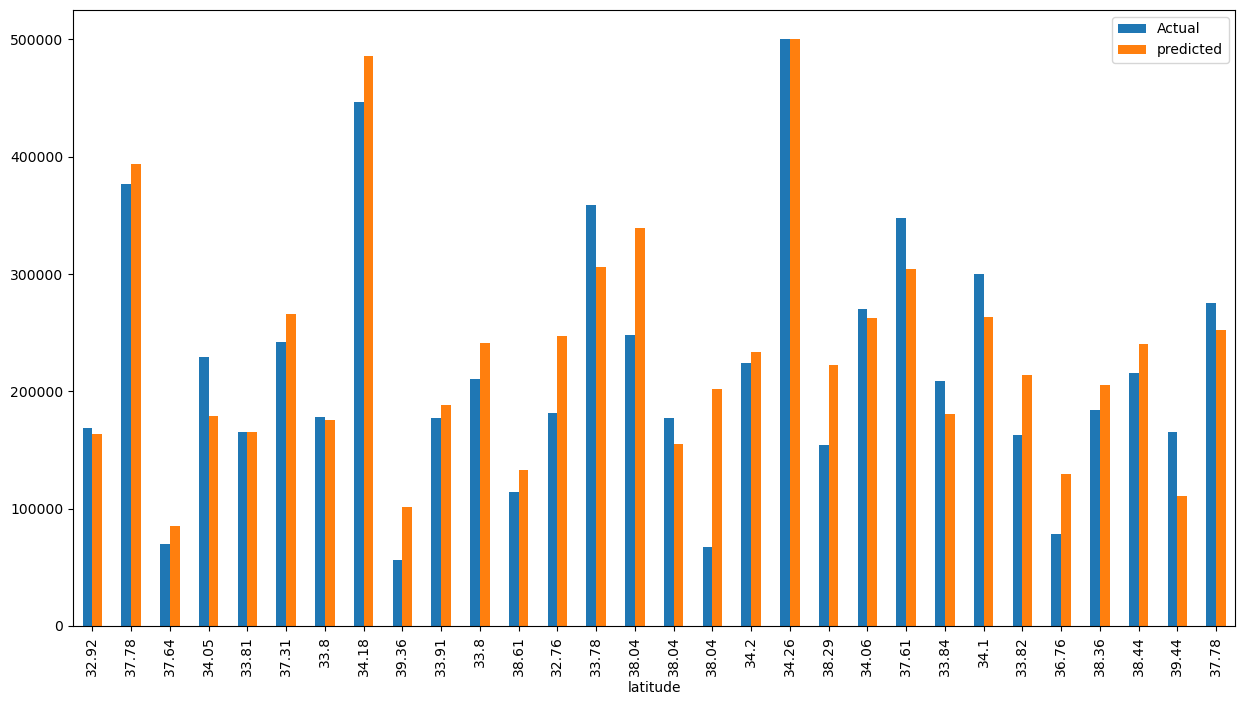

RandomForestRegressor(max_depth=350, n_estimators=900) score is : 0.7037464903091817


In [30]:
model_eval(rd_forest)

The bar chart describes a linear regression of 0.544 which indicates that the linear regression model explains around 54.4% of the variance of the median house value. The random forest regressor signifies 70% of the variance. This is a better result which provide for accurate prediction as compared to linear regression. 

# Train Linear Regression Models 



Here First we split the data into training and test data and apply linear regression model and fit the data into linear regression to further predict the data.Further we can use two most correlated variables for the purpose of dependant variables and fit the data into the regression.

In [31]:
train_case, test_case = train_test_split(df, test_size=0.2, random_state=142)
print("Train case shape 2",train_case.shape)
print("Test case shape 2",test_case.shape)

Train case shape 2 (16512, 8)
Test case shape 2 (4128, 8)


In [32]:
reg = linear_model.LinearRegression()
X_case = train_case[['total_rooms', 'median_income']]
y_case= train_case['median_house_value']  
reg.fit(X_case, y_case)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [-2.97428860e-01  4.19946411e+04] + 45190.262169186404


In [33]:
reg = linear_model.LinearRegression()
X_train = train_case[['total_rooms', 'median_income']]
y_train = train_case['median_house_value']  

X_test = test_case[['total_rooms', 'median_income']]
y_test = test_case['median_house_value'] 

In [34]:
reg.fit(X_case, y_case)

LinearRegression()

In [35]:
predicted = reg.predict(X_test)
mse = round(((np.array(y_test) - predicted)**2).sum()/len(y_test),4)
rmse =np.sqrt(mse)
r_squared = r2_score(y_test, predicted)

In [30]:
print("MSE",mse)
print("RMSE",rmse)
print("R Squared", r_squared)

MSE 7052476025.4049
RMSE 83979.021341076
R Squared 0.46784673863164816


## Analysis

The MSE and RMSE score are high and the R-squared value is relatively high suggesting that the model does not captures the linear regression model of the dependent and the independent variable and we cannot make reasonable prediction of the data using this model. We can further try to improve the model using polynomial regression and RFE model and evaluate the data if it can produce proper result.

In [64]:
# 1. Baseline Model - Linear Regression
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
y_pred_baseline = lin_reg_model.predict(X_test)
mse_baseline = mean_squared_error(y_test, y_pred_baseline)

In [65]:
# 2. Improved Model - Polynomial Regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)
y_pred_poly = poly_reg_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

In [66]:
# 3. Feature Selection - RFE
rfe = RFE(estimator=LinearRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
lin_reg_model_rfe = LinearRegression()
lin_reg_model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = lin_reg_model_rfe.predict(X_test_rfe)
mse_rfe = mean_squared_error(y_test, y_pred_rfe)

In [67]:
print("Baseline Linear Regression MSE:", mse_baseline)
print("Polynomial Regression MSE (degree={}):".format(degree), mse_poly)
print("RFE-selected Features Linear Regression MSE:", mse_rfe)

Baseline Linear Regression MSE: 7052476025.404893
Polynomial Regression MSE (degree=2): 6915117524.666946
RFE-selected Features Linear Regression MSE: 7052476025.404893


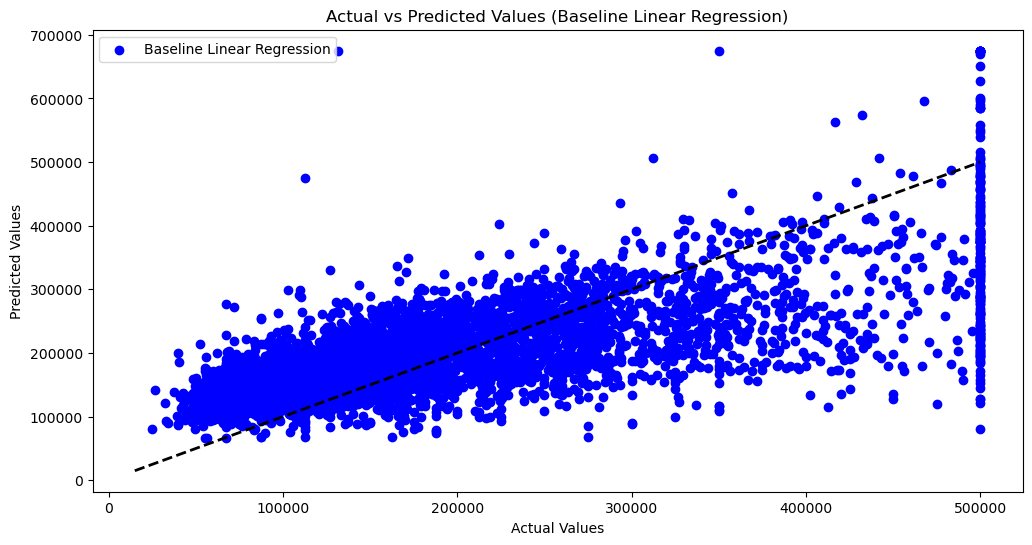

In [68]:
# Plotting regression results
plt.figure(figsize=(12, 6))

# Scatter plot for actual vs predicted values (baseline)
plt.scatter(y_test, y_pred_baseline, color='blue', label='Baseline Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Baseline Linear Regression)')
plt.legend()
plt.show()

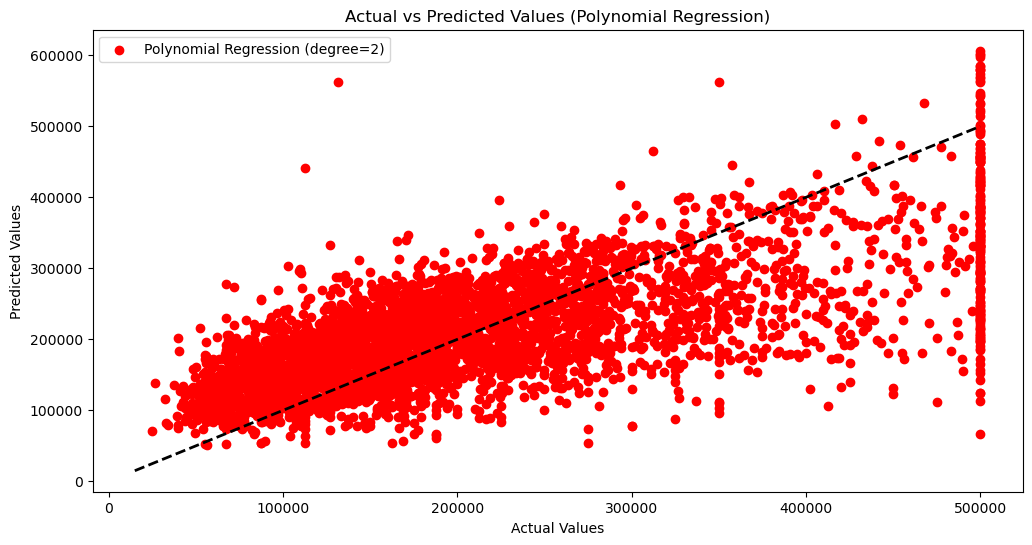

In [69]:
# Scatter plot for actual vs predicted values (polynomial)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression (degree={})'.format(degree))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Polynomial Regression)')
plt.legend()
plt.show()

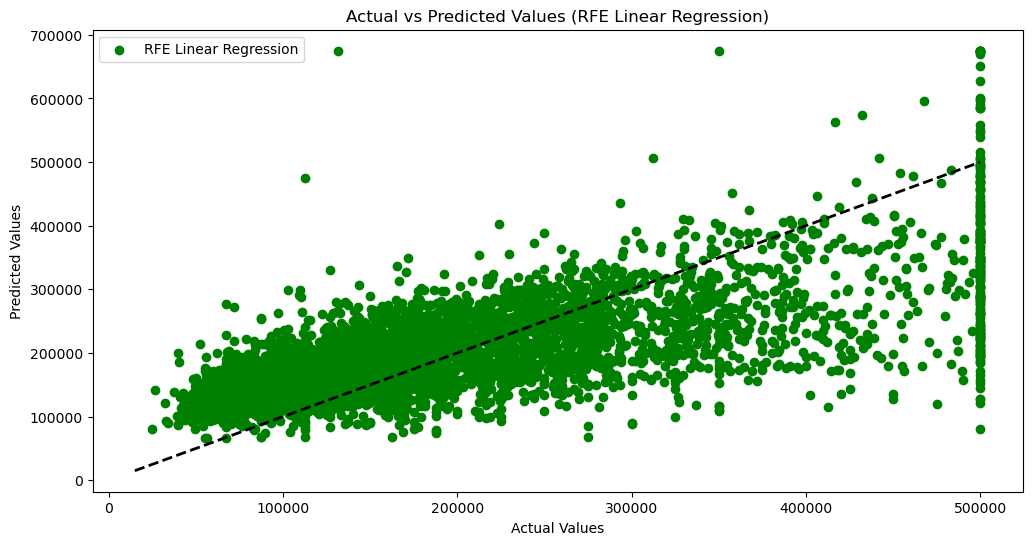

In [70]:
# Scatter plot for actual vs predicted values (RFE)
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rfe, color='green', label='RFE Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (RFE Linear Regression)')
plt.legend()
plt.show()

# Training in KNN model


Here we train the model using KNN model first we fit the model and train the model in KNN.

In [53]:
km = KMeans(n_clusters=2)
km.fit(df)

D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [37]:
df['label'] = km.predict(df)

In [38]:
df.head(12)

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
latitude,,,,,,,,,
37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2
37.85,-122.25,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,3
37.84,-122.25,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,2
37.84,-122.25,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,3
37.84,-122.26,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,3


In [39]:
df[df.label == 1]

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
latitude,,,,,,,,,
37.84,-122.26,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,1
37.85,-122.26,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,1
37.85,-122.26,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,1
37.85,-122.27,52.0,1966.0,347.0,793.0,331.0,2.7750,152500.0,1
37.85,-122.27,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0,1
...,...,...,...,...,...,...,...,...,...
38.53,-121.99,6.0,4598.0,834.0,2561.0,812.0,3.4186,127300.0,1
38.57,-121.92,10.0,1320.0,246.0,898.0,228.0,1.9327,193800.0,1
38.72,-121.90,38.0,575.0,107.0,259.0,109.0,3.7500,187500.0,1


In [40]:
df_mean = df.groupby(['label']).agg('mean')
df_mean

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
label,,,,,,,,
0,-119.749938,33.286865,2958.294300,514.432466,1159.757745,480.640644,7.016419,480442.481413
1,-119.238925,27.474060,2597.610127,552.453091,1564.107331,513.958838,3.466814,164514.833799
2,-119.892077,30.138065,3067.657204,566.556989,1381.895914,536.588817,5.239836,346693.032258
3,-119.663362,28.444884,2926.397580,582.994279,1507.258526,551.601320,4.346604,245158.635864
4,-119.685736,28.185205,2181.054390,476.812347,1297.109129,432.193249,2.502425,89999.317244


### Hierarchical Clustering

Since we don't know how many clusters there should be in the data, a better approach is to use Hierarchical clustering and examine the dendograph to understand what natural clusters are present in the data.  

 

In [41]:
dist = pdist(df, 'euclidean')
linkage_matrix = linkage(dist,method='complete')

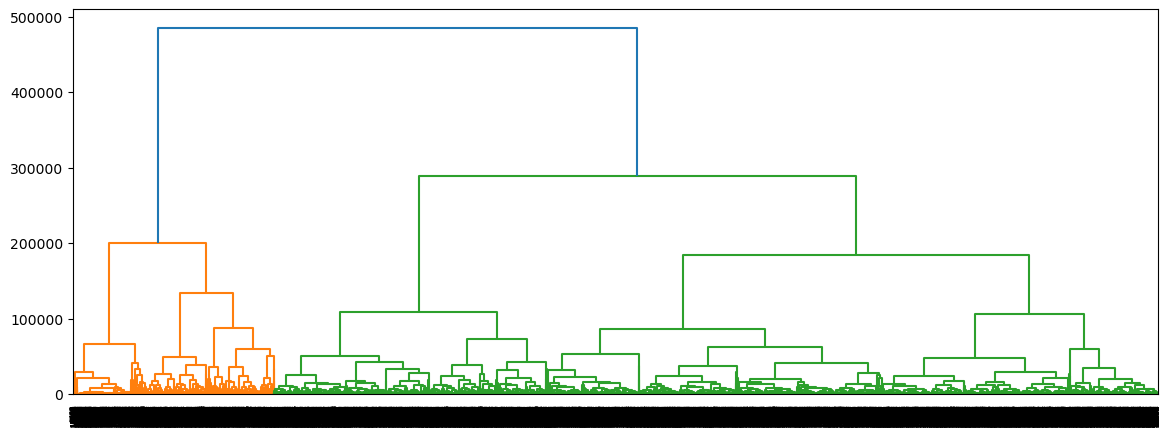

In [42]:
plt.figure(figsize=(14,5))
dendrogram(linkage_matrix)
plt.show()

In [44]:
labels = cut_tree(linkage_matrix, n_clusters=5)
df['label']=labels
df.head()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,label
latitude,,,,,,,,,
37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,1
37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,1
37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,1
37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,1


### Train and tune the KNN Model


In [52]:
# initialize the KNN model 
knn_model = KNeighborsClassifier(n_neighbors=2)

# fit the model on the training data
knn_model.fit(X_train, y_train)

# make predictions on the training and test data
train_predictions = knn_model.predict(X_train)
test_predictions = knn_model.predict(X_test)

# calculate the accuracy on both training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Accuracy on training set:", train_accuracy)
print("Accuracy on test set:", test_accuracy)

Accuracy on training set: 0.49460998062015504
Accuracy on test set: 0.00436046511627907


### Analysis of the result

Here we got accuracy score of 49% and 0.4% on the training and test set which is average result.

#  Tune the hyper-parameter K

D:\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


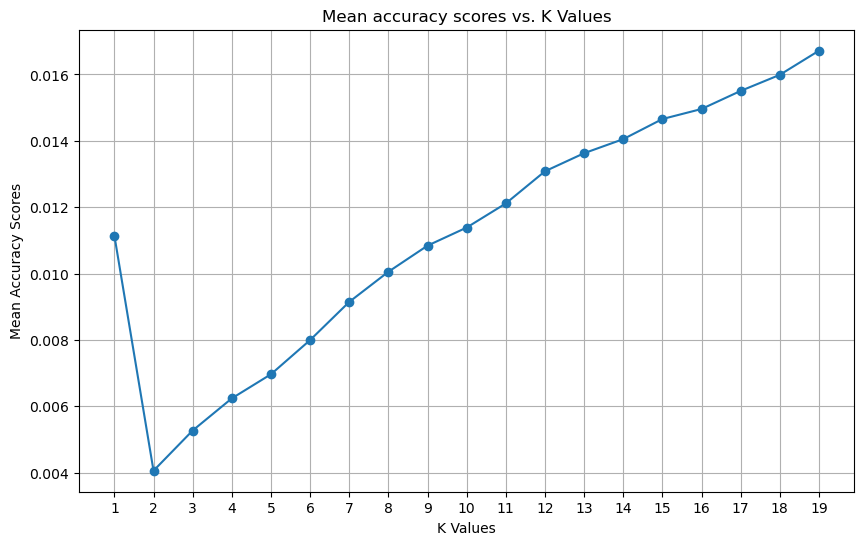

Best k value: 19


In [40]:
# define the range of k values to search over
k_values = np.arange(1, 20)  

# define the parameter grid for GridSearchCV
param_grid = {'n_neighbors': k_values}

# perform grid search using GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# mean cross-validated accuracy scores for each k value
mean_scores = grid_search.cv_results_['mean_test_score']

# visualization
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-')
plt.title('Mean accuracy scores vs. K Values')
plt.xlabel('K Values')
plt.ylabel('Mean Accuracy Scores')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# best k value
best_k = grid_search.best_params_['n_neighbors']
print("Best k value:", best_k)

### Analysis of the result

The best K value for the model is 19 . The X axis represents the number of neighbors(k) considered as classifier whereas the Y-axis represents the mean accuracy score. The graph highlights the mean accurancy score increases as the number of neighbor increases. A small value of k means that the classifier only considers the labels of the few nearest neighbor, this can cause the model to fail to capture the underlying pattern in the data . Whereas, the large value k represents the classifier considers too many neighbors which can lead to overfitting.

The optimal value of k depends upon the data set and for this one the value is 19.